# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# # uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('../data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [4]:
sns.set_theme(palette='pastel')

### **Question 1:** How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations
- Numerical:
  - 4 integer columns
    - order_id: which would be primary keys used to identify orders from customers
    - customer_id: which is a custom id used to identify the customer
    - food_preparation_time: the food prepartion time in minutes
    - delivery_time: the time it takes to deliver the food in minutes
  - 1 float column
    - cost_of_the_order: decimal, $dollars.cents
- Categorical:
  - 4 object types
    - restaurant_name: name of restaurant
    - cuisine_type: the type or origin of food
    - day_of_the_week: monday-friday
    - rating: assuming from not given - 5

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# check if there are missing values
df.isna().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

#### Observations: No missing/na/null values in the dataframe.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# summary of all
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [9]:
# mean of each cuisine type
df.groupby('cuisine_type')['cost_of_the_order'].mean()

cuisine_type
American          16.319829
Chinese           16.305209
French            19.793889
Indian            16.919726
Italian           16.418691
Japanese          16.304532
Korean            14.001538
Mediterranean     15.474783
Mexican           16.933117
Middle Eastern    18.820612
Southern          19.300588
Spanish           18.994167
Thai              19.207895
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

In [10]:
# count of each cuisine type
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [11]:
# summary stats of just the food prep column
df.describe()['food_preparation_time']

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
- Min: 20 minutes
- Avg: 27.37 minutes
- Max: 35 minutes


### **Question 5:** How many orders are not rated?

In [12]:
# count of each rating in the data
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations: 736 not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

d:\Anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


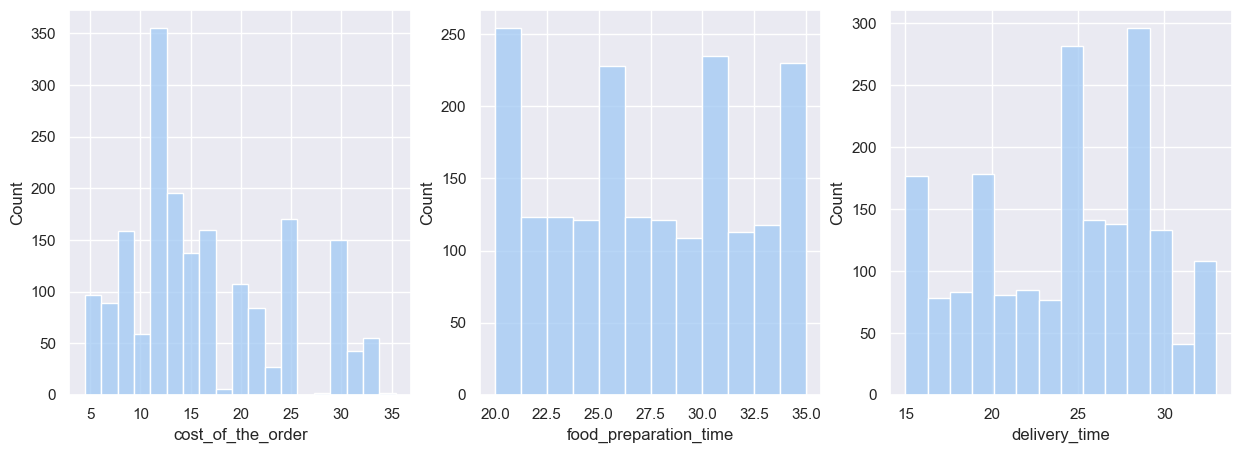

In [13]:
# histograms of continuous variables
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='cost_of_the_order', ax=ax1)
sns.histplot(data=df, x='food_preparation_time', ax=ax2)
sns.histplot(data=df, x='delivery_time', ax=ax3)
plt.show()

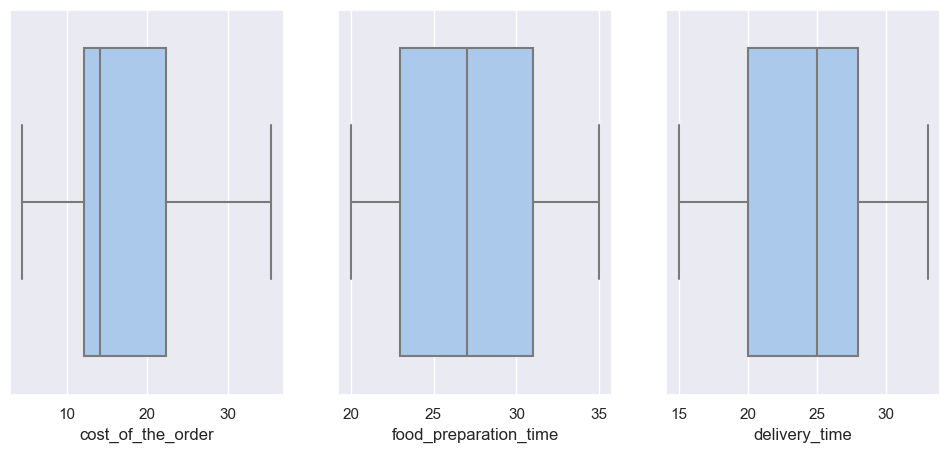

In [14]:
# box plot to properly see if there is a skew and to see the median, q1, q3, iqr, min and max.
# it looks like there could be some skewness to the right in the cost of the order column
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
sns.boxplot(data=df, x='cost_of_the_order', ax=ax1)
sns.boxplot(data=df, x='food_preparation_time', ax=ax2)
sns.boxplot(data=df, x='delivery_time', ax=ax3)
plt.show()

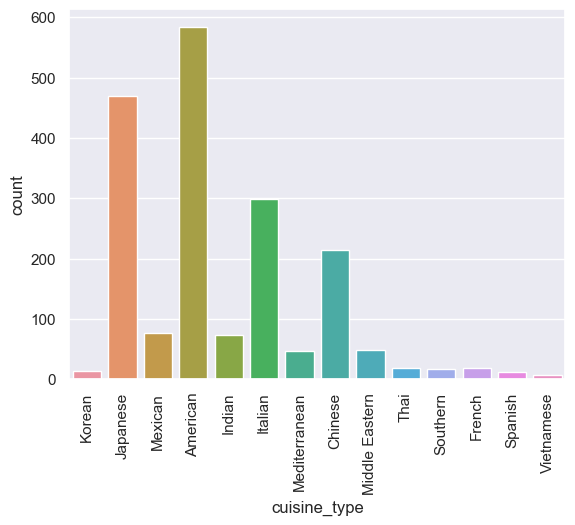

In [15]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [16]:
# the whole dataset is an order from a customer to we can just count each restaurant name
df['restaurant_name'].value_counts(sort=True).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
- 1st is Shake Shack
- 2nd is The Meatball Shop
- 3rd is Blue Ribbon Sushi
- 4th is Blue Ribbon Fried Chicken
- 5th is Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [17]:
# set day of the week to weekend and count the cuisine types
df.loc[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts(sort=True)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations: American food is the most popular on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [18]:
# Write the code here
str(len(df[df['cost_of_the_order']>20])/df.shape[0]*100)+'%'

'29.24130663856691%'

#### Observations: About 29.24% of the orders cost most than $20.


### **Question 10**: What is the mean order delivery time?

In [19]:
# get average delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations: Mean delivery time is around 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [20]:
# customer id will be the same so we just count the number of times that id appears in the dataframe and take the top 3 while sorted
df['customer_id'].value_counts(sort=True).head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations: The top 3 most frequent customers by id are 52832, 47440, 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [21]:
# Write the code here
# sns.pairplot(data=df);
# nothing is really correlated whith each other. There are no patterns in the scatterplots

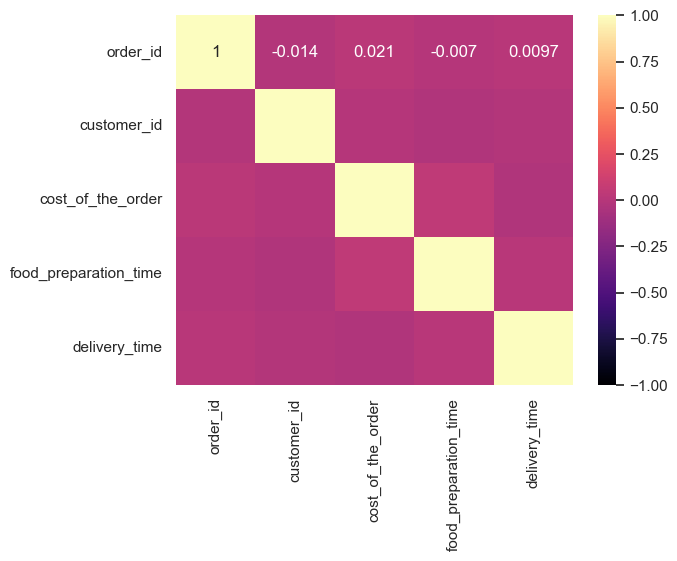

In [25]:
# viz of correlation to see if there is anything that affects the other/any relationships with the columns
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='magma')
plt.show()

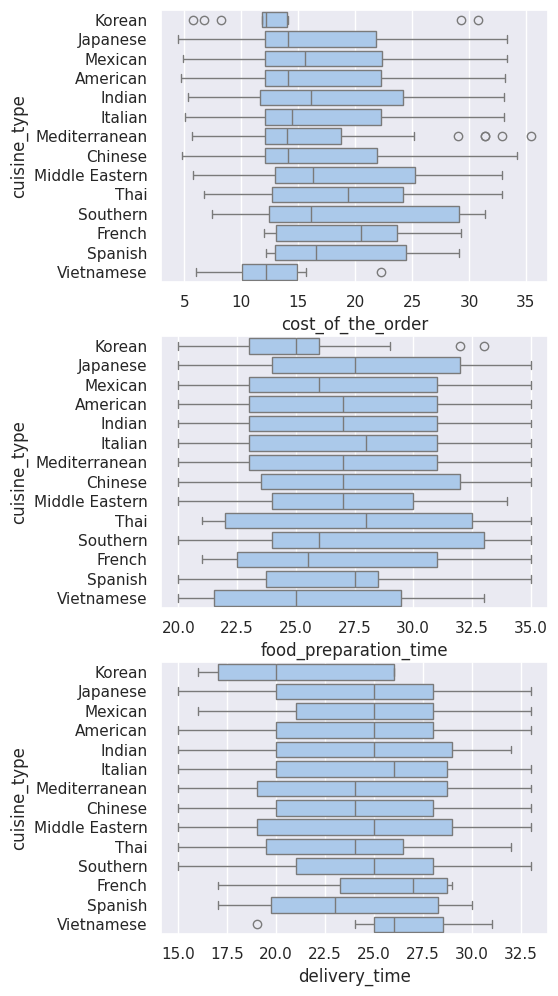

In [ ]:
# boxplots to show thge skewness of the cost, prep time, and delivery time for each cuisine
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 12))
sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', ax=ax1)
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', ax=ax2)
sns.boxplot(data=df, x='delivery_time', y='cuisine_type', ax=ax3)
plt.show()

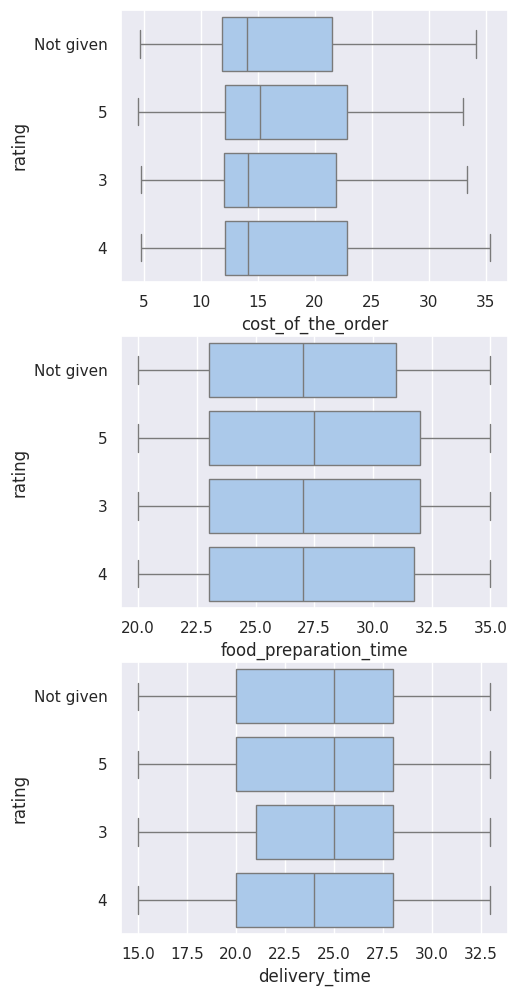

In [ ]:
# boxplot of rating against cost, food prep. and delivery time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 12))
sns.boxplot(data=df, x='cost_of_the_order', y='rating', ax=ax1)
sns.boxplot(data=df, x='food_preparation_time', y='rating', ax=ax2)
sns.boxplot(data=df, x='delivery_time', y='rating', ax=ax3)
plt.show()

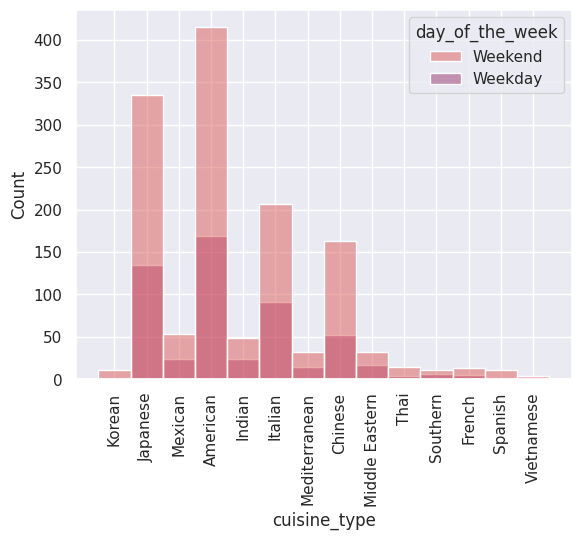

In [ ]:
sns.histplot(data=df, x='cuisine_type', hue='day_of_the_week', palette='flare')
plt.xticks(rotation=90)
plt.show()

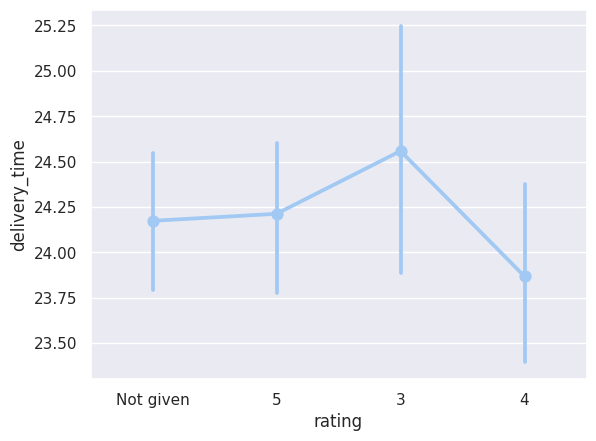

In [ ]:
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# get the name of the columns which have a rating count of more than 50
temp = df[df['rating']!='Not given']['restaurant_name'].value_counts() > 50
more_than_50 = list(temp[temp==True].index)

# get the dataframe with 50+ ratings and remove the "Not given" value in the ratings column
more_than_50_df = df[df['restaurant_name'].isin(more_than_50)].copy()
more_than_50_df = more_than_50_df[more_than_50_df['rating']!='Not given']

# convert the rating column from object to integer
more_than_50_df['rating'] = more_than_50_df['rating'].astype(int)

# groupby restaurant name so we can get the average rating of each restaurant with rating count of more than 50
more_than_50_df.groupby('restaurant_name')['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# define a function to check conditions
def rev(val):
  if val > 20:
    return val*0.25
  elif val > 5:
    return val*0.15
  else:
    return 0

# apply function to new column
df['company_revenue'] = df['cost_of_the_order'].apply(rev)
df['company_revenue'].sum()

6166.303

#### Observations: The companies total revenue is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
str(len(df[df['delivery_time']+df['food_preparation_time']>60]) / df.shape[0]*100) + '% of the orders take more than 60 minutes to deliver.'

'10.537407797681771% of the orders take more than 60 minutes to deliver.'

#### Observations: 10.5% of the orders take more than 60 minutes to deliver




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: Weekday delivery times are around 28 minutes while weekend delivery times are aroud 22-23 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  It looks like the delivery time doesn't really affect the ratings that much.
- Cost of order seems slightly affected by the cuisine type. So, cuisine types like french and thai food might be higher end and might cost more.
- Food preparation time is pretty much the same for each cuisine type.
- People mostly order on the weekend. So, naturally the delivery time might be a little bit longer because of an increase of orders.
- The cost of the order, delivery time, or food prep time doesn't affect the ratings. The median of all of them are prety much the same for each rating. Nothing is obviously skewed.


### Recommendations:

*  I'd recommend to maybe increase the price of deliveries on the weekend by a small percentage, since most people order on the weekend, so the company receives more revenue, and with that revenue they can do a lot of things with it like open other restaurants or create a chain.
- I think we should also focus more on the other cuisine types. Everything that has below 100 orders. Maybe put more locations closer to more populated areas but where there is not many competitors or cuisine types in that area.
-  The demand or most ordered type of food right now seems like American, Japanese, Italian, and Chinese food. So, maybe instead of focusing on the less ordered, we can make places that are most ordered available in more locations, and another reason might be that there are more skilled cooks cooking American, Japanese, Italian, and Chinese food then there are cooking the other types of food. But that would remove the types of food to offer.
- An idea is to also promote the smaller ordered restaurants by advertising, giving samples out, maybe attending events, etc.
- Maybe also send a manager or corporate to take a look on how things are running at each restaurant and check on the reviews on each restaurant so we can make solutions for the problems.